# Proyek Sains Data (Analisis Model Machine Learning)
#### PREDIKSI HARGA PENUTUPAN SAHAM HARIAN TOP 1 INDONESIA MENGGUNAKAN ALGORITMA LINEAR REGRESSION

### Kelompok 1:
1. 10121189 - Muhammad Izham Ali Azhar
2. 10121177 - Muhamad Gilang Abdul Gani
3. 10121191 - Harist Muhammad Lutfi
4. 10121194 - Muhamad Repiyan Riski
5. 10121203 - Azka Zaki Ramadhan
6. 10121178 - Faisal Rahman

TODO:
 - Memperbaiki tipe data kolom ke integer bukan float.

### Dataset Preparation

In [ ]:
from datetime import datetime, timedelta
import pandas as pd
import yfinance as yf

ticker = "BBCA.JK"

# UNCOMMENT THIS BELOW IF YOU NEED TO FETCH NEW DATA
# five_years_ago = (datetime.now() - timedelta(days=5*365)).strftime("%Y-%m-%d")
# data = yf.download(ticker, start=five_years_ago, progress=False)
# data.columns = [ columns[0].lower() for columns in data.columns ]
# data.index.name = data.index.name.lower()
# data.to_csv("../dataset/dataset_bbca_5y.csv")

dataset = pd.read_csv('../dataset/dataset_bbca_5y.csv')
dataset = dataset[[*dataset.drop('close', axis=1), 'close']]
dataset.sample(3)

,date,adj close,high,low,open,volume,close
1084,2024-06-12 00:00:00+00:00,9204.093750,9325.0,9250.0,9300.0,49785700,9250.0
1157,2024-09-26 00:00:00+00:00,10646.898438,10875.0,10675.0,10875.0,84960100,10700.0
513,2022-01-20 00:00:00+00:00,7239.116211,7775.0,7625.0,7725.0,59925500,7775.0


In [14]:
# Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       1209 non-null   object 
 1   adj close  1209 non-null   float64
 2   high       1209 non-null   float64
 3   low        1209 non-null   float64
 4   open       1209 non-null   float64
 5   volume     1209 non-null   int64  
 6   close      1209 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 66.2+ KB


In [15]:
# Describe
dataset.describe()

,adj close,high,low,open,volume,close
count,1209.000000,1209.000000,1209.000000,1209.000000,1.209000e+03,1209.000000
mean,7483.275839,7953.081059,7808.345740,7881.687345,8.807260e+07,7879.768404
std,1638.670424,1491.115853,1493.783363,1490.423794,5.733051e+07,1494.609765
min,3973.115723,4800.000000,4325.000000,4450.000000,0.000000e+00,4430.000000
25%,6021.643066,6595.000000,6500.000000,6560.000000,5.711550e+07,6565.000000
50%,7355.500977,7900.000000,7750.000000,7825.000000,7.537160e+07,7875.000000
75%,8784.651367,9125.000000,9025.000000,9100.000000,1.022386e+08,9075.000000
max,10895.657227,10950.000000,10775.000000,10900.000000,7.564316e+08,10950.000000


### Preprocessing

In [16]:
# Preprocessing - Remove missing values
display(dataset.isna().sum(), )
dataset.dropna(inplace=True)

date         0
adj close    0
high         0
low          0
open         0
volume       0
close        0
dtype: int64

In [17]:
# Preprocessing - Transformation (MinMax, 0-1)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

to_scale = dataset.columns.difference(['date', 'close'])
dataset[to_scale] = scaler.fit_transform(dataset[to_scale])

dataset.sample(5)

,date,adj close,high,low,open,volume,close
137,2020-07-08 00:00:00+00:00,0.243203,0.238211,0.256589,0.238760,0.140719,6200.0
825,2023-05-05 00:00:00+00:00,0.684566,0.691057,0.717054,0.705426,0.085685,9000.0
637,2022-08-01 00:00:00+00:00,0.450264,0.439024,0.468992,0.449612,0.138600,7500.0
1100,2024-07-08 00:00:00+00:00,0.870635,0.853659,0.872093,0.860465,0.096378,10050.0
463,2021-11-10 00:00:00+00:00,0.451538,0.467480,0.503876,0.500000,0.062800,7650.0


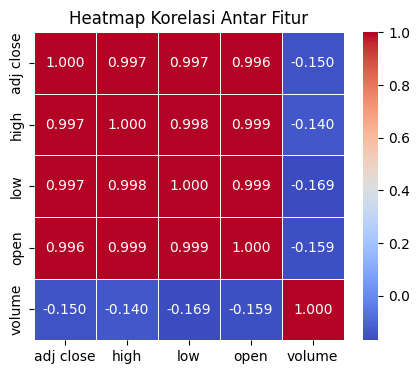

,date,adj close,high,low,open,close
129,2020-06-26 00:00:00+00:00,0.170055,0.156098,0.203876,0.196899,5645.0
871,2023-07-18 00:00:00+00:00,0.705541,0.723577,0.740310,0.736434,9150.0
464,2021-11-11 00:00:00+00:00,0.454890,0.479675,0.507752,0.503876,7675.0
1033,2024-03-15 00:00:00+00:00,0.852147,0.894309,0.887597,0.891473,10150.0
1068,2024-05-17 00:00:00+00:00,0.827514,0.821138,0.813953,0.798450,9750.0


In [18]:
# Preprocessing - Feature Selection (Pearson Correlation)
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = dataset.drop(columns=['date', 'close']).corr(numeric_only=True)

plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.5)

plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

# Drop 'volume' because it has negative correlation.
dataset.drop(columns=['volume'], inplace=True)

dataset.sample(5)

In [19]:
# Dataset split train test
from sklearn.model_selection import train_test_split

x = dataset.drop(columns=['close'])
y = dataset['close']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

train_date = x_train['date']
x_train.drop(columns=['date'], inplace=True)

test_date = x_test['date']
x_test.drop(columns=['date'], inplace=True)

### Modeling

In [20]:
# Train the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

### Evaluation

Mean Absolute Error (MAE): 59.39339111182532
Mean Squared Error (MSE): 5343.366956606568
Root Mean Squared Error (RMSE): 73.09833757758496


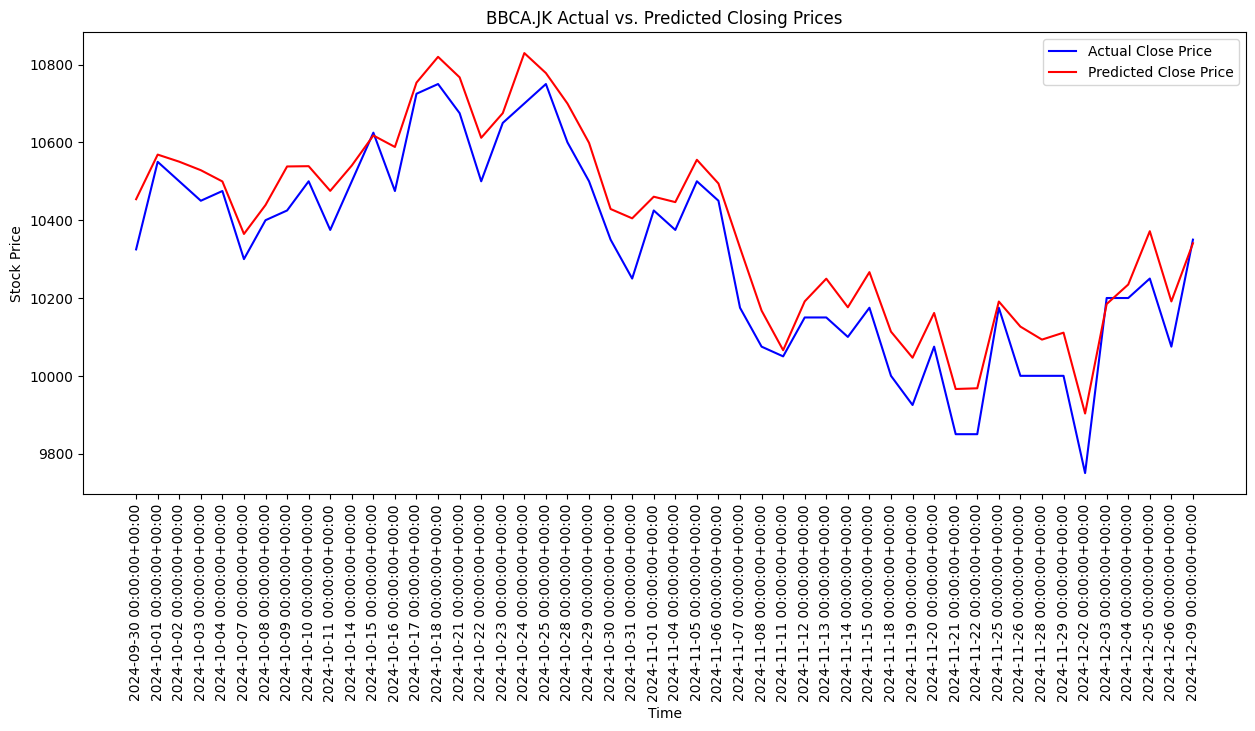

In [21]:
# Testing and Evaluation
import matplotlib.pyplot as plt
import numpy as np

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

plt.figure(figsize=(15, 6))
plt.plot(y_test.values[-50:], label="Actual Close Price", color="blue")
plt.plot(test_date[-50:], y_pred[-50:], label="Predicted Close Price", color="red")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.xticks(rotation=90)
plt.title(f"{ticker} Actual vs. Predicted Closing Prices")
plt.legend()
plt.show()

## Predictions

In [ ]:
# Import libraries
import pandas as pd
from sklearn.linear_model import LinearRegression

# Days to predict
n_predictions = 20

df = pd.read_csv('../dataset/dataset_bbca_5y.csv', parse_dates=['date'])
df.set_index('date', inplace=True)

# Create lag features
df['Close_Lag1'] = df['close'].shift(1)
df['Close_Lag2'] = df['close'].shift(2)
df['Close_Lag3'] = df['close'].shift(3)
df['Close_Lag4'] = df['close'].shift(4)
df['Close_Lag5'] = df['close'].shift(5)

# Moving averages
df['Close_MA5'] = df['close'].rolling(window=5).mean()
df['Close_MA10'] = df['close'].rolling(window=10).mean()

# Price range and volatility
df['Daily_Range'] = df['high'] - df['low']
df['Close_STD5'] = df['close'].rolling(window=5).std()

df.dropna(inplace=True)

# Define Features for Model Training
features = ['Close_Lag1', 'Close_Lag2', 'Close_Lag3', 'Close_Lag4', 'Close_Lag5', 'Close_MA5', 'Close_MA10', 'Daily_Range', 'Close_STD5']

X = df[features]
y = df['close'] 

# Train the model on the entire dataset
model = LinearRegression()
model.fit(X, y)

# Use the last available data to predict the next 5 days
last_row = df.iloc[-1][features]
future_predictions = []

# Predict for n_predictions :D
for day in range(n_predictions):
    prediction_input = pd.DataFrame([last_row], columns=features)

    # Predict the next day's close price
    prediction = model.predict(prediction_input)[0]
    future_predictions.append(prediction)

    # Update the feature values for the next day's prediction
    updated_features = last_row.copy()
    updated_features['Close_Lag5'] = updated_features['Close_Lag4']
    updated_features['Close_Lag4'] = updated_features['Close_Lag3']
    updated_features['Close_Lag3'] = updated_features['Close_Lag2']
    updated_features['Close_Lag2'] = updated_features['Close_Lag1']
    updated_features['Close_Lag1'] = prediction
    updated_features['Close_MA5'] = ((last_row['Close_MA5'] * 4) + prediction) / 5
    updated_features['Close_MA10'] = ((last_row['Close_MA10'] * 9) + prediction) / 10
    updated_features['Daily_Range'] = updated_features['Daily_Range']
    updated_features['Close_STD5'] = last_row['Close_STD5']

    # Prepare for the next iteration
    last_row = updated_features

now =  pd.Timestamp('now').normalize()
future_workdays = pd.date_range(start=now, periods=n_predictions, freq='B').strftime('%Y-%m-%d').tolist()

results = pd.DataFrame({"date": future_workdays, "close": future_predictions})

results

,date,close
0,2024-12-10,10350.000000
1,2024-12-11,10335.000000
2,2024-12-12,10293.000000
3,2024-12-13,10282.400000
4,2024-12-16,10090.320000
5,2024-12-17,10170.176000
6,2024-12-18,10270.996800
7,2024-12-19,10342.618240
8,2024-12-20,10393.716032
9,2024-12-23,10230.470618
